In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:

class Shower:
    def show_img(
        img_mtx: np.ndarray,
        extra_img_params: dict = {},
        in_gray: bool = True,
        is_show: bool = True,
        title: str = None,
        figsize: tuple = None
    ):
        '''
            cmap='gray': display the image in grayscale
        '''

        if in_gray:
            img_params = {'X': img_mtx} | {'cmap': 'gray'} | extra_img_params
        else:
            img_params = {'X': img_mtx} | extra_img_params

        if figsize is not None:
            plt.figure(figsize=figsize)

        plt.imshow(**img_params)
        plt.axis('off')

        if title:
            plt.title(title)

        if is_show:
            plt.show()

    def show_two_img(
        img_mtx1: np.ndarray,
        img_mtx2: np.ndarray,
        title_img1: str = None,
        title_img2: str = None,
        extra_img1_params: dict = {},
        extra_img2_params: dict = {},
        figsize: tuple = (8, 12)
    ):
        plt.figure(figsize=figsize)

        plt.subplot(1, 2, 1)
        Shower.show_img(img_mtx1, extra_img1_params, is_show=False)
        if title_img1:
            plt.title(title_img1)

        plt.subplot(1, 2, 2)
        Shower.show_img(img_mtx2, extra_img2_params, is_show=False)
        if title_img2:
            plt.title(title_img2)

        plt.tight_layout()  # fit into the figure area without overlapping
        plt.show()



In [3]:
PICTURES_PATH = 'materials/imgs/'

HAAR_METHOD_FROM_CV = cv.data.haarcascades + 'haarcascade_frontalface_default.xml'
HAAR_METHOD = 'materials/haarcascade_frontalface_alt.xml'

 # Каскады Хаара

In [4]:
PICTURE1_PATH = PICTURES_PATH + 'face1.jpeg'

PICTURE1_PATH


'materials/imgs/face1.jpeg'

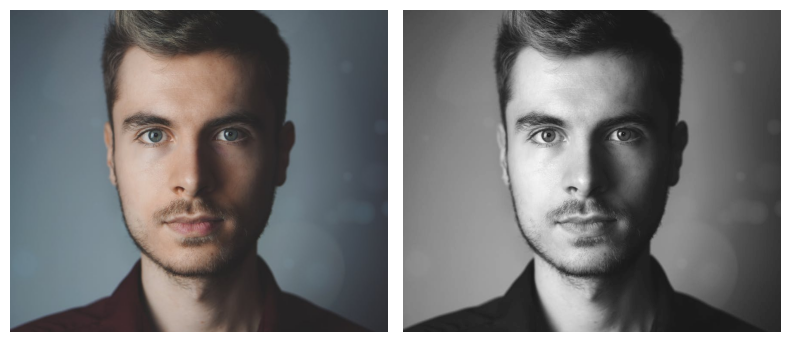

In [5]:
# Чтение изображения
original_image = cv.imread(PICTURE1_PATH)
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Конвертация изображения в градации серого
grayscale_image = cv.cvtColor(original_image, cv.COLOR_RGB2GRAY)


Shower.show_two_img(original_image, grayscale_image)


In [6]:
# Загрузка классификатора и создание каскадного объекта для распознавания лиц (указан путь к модели в вашей папке с данным ноутбуком)

face_cascade = cv.CascadeClassifier(HAAR_METHOD)

face_cascade

< cv2.CascadeClassifier 0x11b95a5d0>

In [7]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

detected_faces

array([[164,  98, 500, 500]], dtype=int32)

In [8]:
tmp_original_image = original_image.copy()

for (column, row, width, height) in detected_faces:
    cv.rectangle(
        tmp_original_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

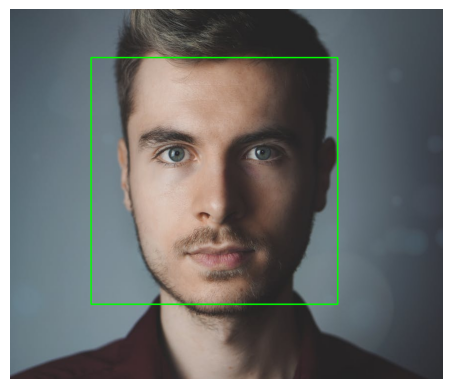

In [9]:
Shower.show_img(tmp_original_image)

 # ДЗ: Реализация класса с моделью каскадов Хаара

 Напишите класс, который при инициализации должен принимать на вход путь к "*.xml" файлу обученной модели каскадов Хаара. Класс должен содержать функционал для загрузки изображения и вывода, с помощью этой обученной модели, результата распознавания лиц на изображении. Также в подписи к названию результата необходимо добавить количество задетектированных лиц. Приведите как минимум два примера работы такого класса.

In [10]:
class FaceDetection:
    def __init__(
        self,
        modelpath=cv.data.haarcascades + 'haarcascade_frontalface_default.xml'
    ):
        self.modelpath = modelpath
        self.face_cascade = cv.CascadeClassifier(modelpath)

    def _get_image_mtxs(
        self,
        imagepath: str,
        image_convertion: int = cv.COLOR_BGR2RGB,
        gray_convertion: int = cv.COLOR_RGB2GRAY
    ):
        # Чтение изображения
        original_image = cv.imread(imagepath)
        if image_convertion:
            original_image = cv.cvtColor(original_image, image_convertion)

        # Конвертация изображения в градации серого
        grayscale_image = cv.cvtColor(original_image, gray_convertion)

        return original_image, grayscale_image

    def _define_face_rectangle(self, original_image_mtx, detected_faces):
        original_image_mtx_cp = original_image_mtx.copy()

        for (column, row, width, height) in detected_faces:
            cv.rectangle(
                original_image_mtx_cp,
                (column, row),
                (column + width, row + height),
                (0, 255, 0),
                2
            )

        return original_image_mtx_cp

    def detect_faces(
        self,
        grayscale_image: np.ndarray,
        draw_rectangle_mtx: np.array,
        is_print: bool = True
    ):
        detected_faces = face_cascade.detectMultiScale(grayscale_image)

        original_image_detected = self._define_face_rectangle(
            draw_rectangle_mtx, detected_faces
        )

        if is_print:
            print(f'The {len(detected_faces)} faces was detected')
            Shower.show_img(original_image_detected)

        return detected_faces, original_image_detected
    

    def detect_faces_by_filename(
        self,
        imagepath: str,
        image_convertion: int = cv.COLOR_BGR2RGB,
        gray_convertion: int = cv.COLOR_RGB2GRAY,
        draw_rectangle_mtx: np.ndarray = None,
        print_steps: bool = False
    ):

        original_image, grayscale_image = self._get_image_mtxs(
            imagepath, image_convertion, gray_convertion
        )

        if draw_rectangle_mtx is None:
            draw_rectangle_mtx = original_image

        if print_steps:
            Shower.show_two_img(original_image, grayscale_image)
            print('Detected faces coordinates:', detected_faces)

        return self.detect_faces(
            grayscale_image, draw_rectangle_mtx
        )

In [11]:
PICTURE2_PATH = PICTURES_PATH + 'house_photo.jpeg'
PICTURE3_PATH = PICTURES_PATH + 'family.JPG'

PICTURE2_PATH, PICTURE3_PATH


('materials/imgs/house_photo.jpeg', 'materials/imgs/family.JPG')

The 1 faces was detected


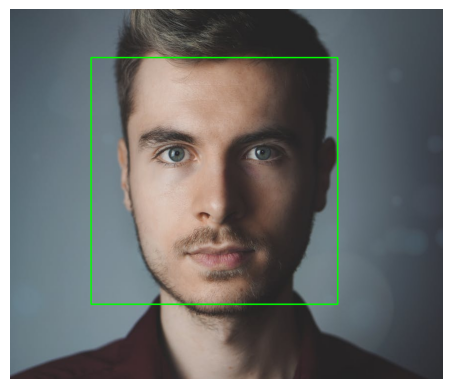

In [12]:
fd = FaceDetection(modelpath=HAAR_METHOD)

detected_faces, original_image_detected = fd.detect_faces_by_filename(
    PICTURE1_PATH
)

The 0 faces was detected


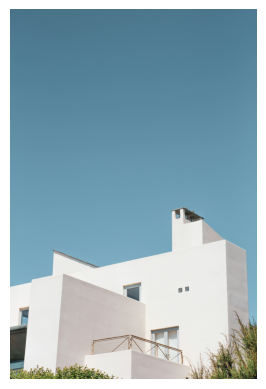

In [13]:
fd = FaceDetection()

detected_faces, original_image_detected = fd.detect_faces_by_filename(
    PICTURE2_PATH
)

The 4 faces was detected


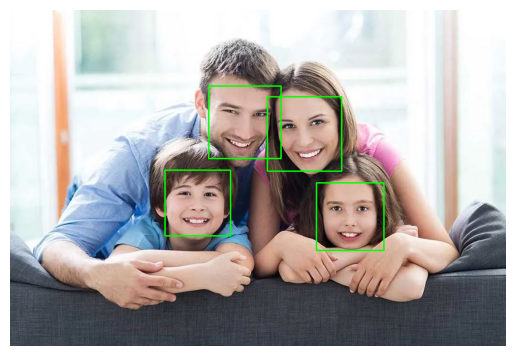

In [14]:
fd = FaceDetection()

detected_faces, original_image_detected = fd.detect_faces_by_filename(
    PICTURE3_PATH
)

The 4 faces was detected


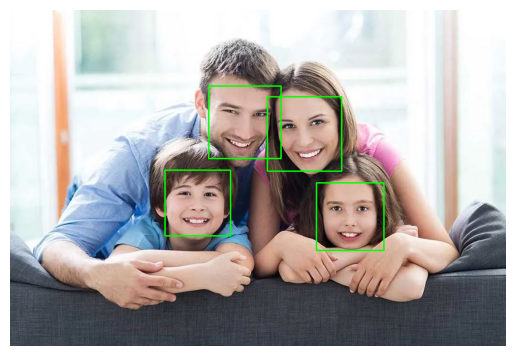

In [15]:
# Compare model from cv and as file

fd = FaceDetection(HAAR_METHOD)

detected_faces, original_image_detected = fd.detect_faces_by_filename(
    PICTURE3_PATH, draw_rectangle_mtx=original_image_detected
)

 # ДЗ (доп)*: Каскады Хаара на видео

 Каскады Хаара могут себя хорошо показать при обнаружении лиц на изображениях. Напишите код для разложения короткого (несколько секунд) видео с людьми на кадры, каждый кадр обработайте и отрисуйте на нем задетектированные лица с помощью каскадов, и соберите результат в одно видео обратно.

 Ниже представлен примерный код для работы по разложению видео на кадры и обратной его сборки из кадров.

 - Дополнительный ссылки - https://medium.com/@haydenfaulkner/extracting-frames-fast-from-a-video-using-opencv-and-python-73b9b7dc9661

 - decord - https://github.com/dmlc/decord

\~~~~~~~~~~ Комментарий студента ~~~~~~~~~~

У меня не получилось реализовать эту историю в приемлимое время. Нужно еще посидеть и поразбираться.

Функции, представленные Вами, у меня падали с ошибкой постоянно. Написала код самостоятельно, но видео получается странное и без детекций. Если сможете указать на проблему, буду очень признательна

\~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [16]:
VIDEOPATH = PICTURES_PATH + 'walking_people.mp4'
SAVEPATH = PICTURES_PATH + 'tmp_results/'

In [17]:
def detected_faces_on_video(
    cap,
    fd,
    save_path: str = SAVEPATH,
    is_save_frames: bool = False
):
    start = 0
    end = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

    cap.set(cv.CAP_PROP_POS_FRAMES, start)

    ret, frame = cap.read()

    all_frames = np.empty((end,) + frame.shape)

    for i in range(start, end):
        if not ret:
            break

        original_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        grayscale_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        _, orig_with_detected = fd.detect_faces(
            grayscale_frame, original_frame, is_print=False
        )

        if is_save_frames:
            save_path = SAVEPATH + f"{i}.jpg"
            cv.imwrite(save_path, orig_with_detected)

        all_frames[i] = frame

        ret, frame = cap.read()
    
    cap.release()
    return all_frames


def create_video_from_frames(
    frames: np.ndarray,
    save_path: str = SAVEPATH+'result.mp4',
    fps: int = 30,
):
    height, width = frames.shape[1:3]

    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    out = cv.VideoWriter(save_path, fourcc, fps, (width, height))

    for frame in frames:
        # Ensure frame is uint8 and in BGR format
        if frame.dtype != np.uint8:
            # Scale float [0,1] to uint8 [0,255]
            frame = (frame * 255).astype(np.uint8)
        if frame.shape[-1] == 3:  # Check if it's RGB
            frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)

        out.write(frame)

    out.release()

In [19]:
cap = cv.VideoCapture(VIDEOPATH)
fd = FaceDetection()
detected_frames = detected_faces_on_video(cap, fd)

In [20]:
create_video_from_frames(detected_frames)